# Overlaying my in-vitro derived signature of tumour uptake

* following visualisation in 2024-11-15_Visualising-clean.jpynb
* now overlaying my sig

# Set up workspace:

In [ ]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [ ]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

Print software versions:

In [ ]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [ ]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


Set plotting parameters

In [ ]:
#sc.settings.set_figure_params(dpi=80, facecolor="white")
#getting rid of this as it messes up heatmaps

In [ ]:
# read in data
data = sc.read_h5ad('NRclean_clustered.h5ad')

In [ ]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

### Overlay my tumour uptake signature: 

In [ ]:
#make an object with my sigs - see excel file Nikita-mregDC_DEG_summary on i drive
Uptake_sig = ["CCL22","IL4I1","SIRPA","CCR7","CHST11","GPR157","RGS1","BIRC3","TRAF1","CSF2RA","TBC1D13","LAMP3","MREG","PPP1R14A","SPRED2","CD83","TXN","MOB3A","NFKB1","TBC1D4","CDK2","WFDC21P","ARAP2","ZER1","ACSL1","SPINT2","SQSTM1","TBC1D8","JAG1","AC073508.3","BATF","ETV3","BCL2","KIF2A","FSCN1","TNFAIP3","CCDC28B","NR4A3","CYTIP","PLEK","FOXO1","TOMM34","TRAFD1","PPP1R16B","CXCR4","CD40","ENTPD7","CDKN1A","BID","MARCKS","DUSP5","MAP4K4","BCL2L1","ISG20","RNF145","RNF121","GPR132","RASGEF1B","CYRIA","RAB10","CERS6","IL1R1","STK4","CLEC2D","AL390719.1","ZBTB38","IFNGR2","CD274","SLC41A2","NRP2","ANKRD33B","GPR183","POGLUT1","ADORA2A","JADE3","KHDRBS3","CTNNB1","SLCO5A1","NFKB2","RGS2","SEC61B","ZNRF1","RELB","C12orf45","IRF2","EPOP","MXD1","RAB5B","PADI2","DRAM1","MTMR4","EEF2K","GCNT2","RAPH1","BCL2A1","SEC23B","PIM3","ANTXR2","ABTB2","TMEM200A"]    

In [ ]:
#score genes
sc.tl.score_genes(data, Uptake_sig, score_name='Uptake_score')

In [ ]:
colour_vars = ["Uptake_score","clean_labels_v1"]

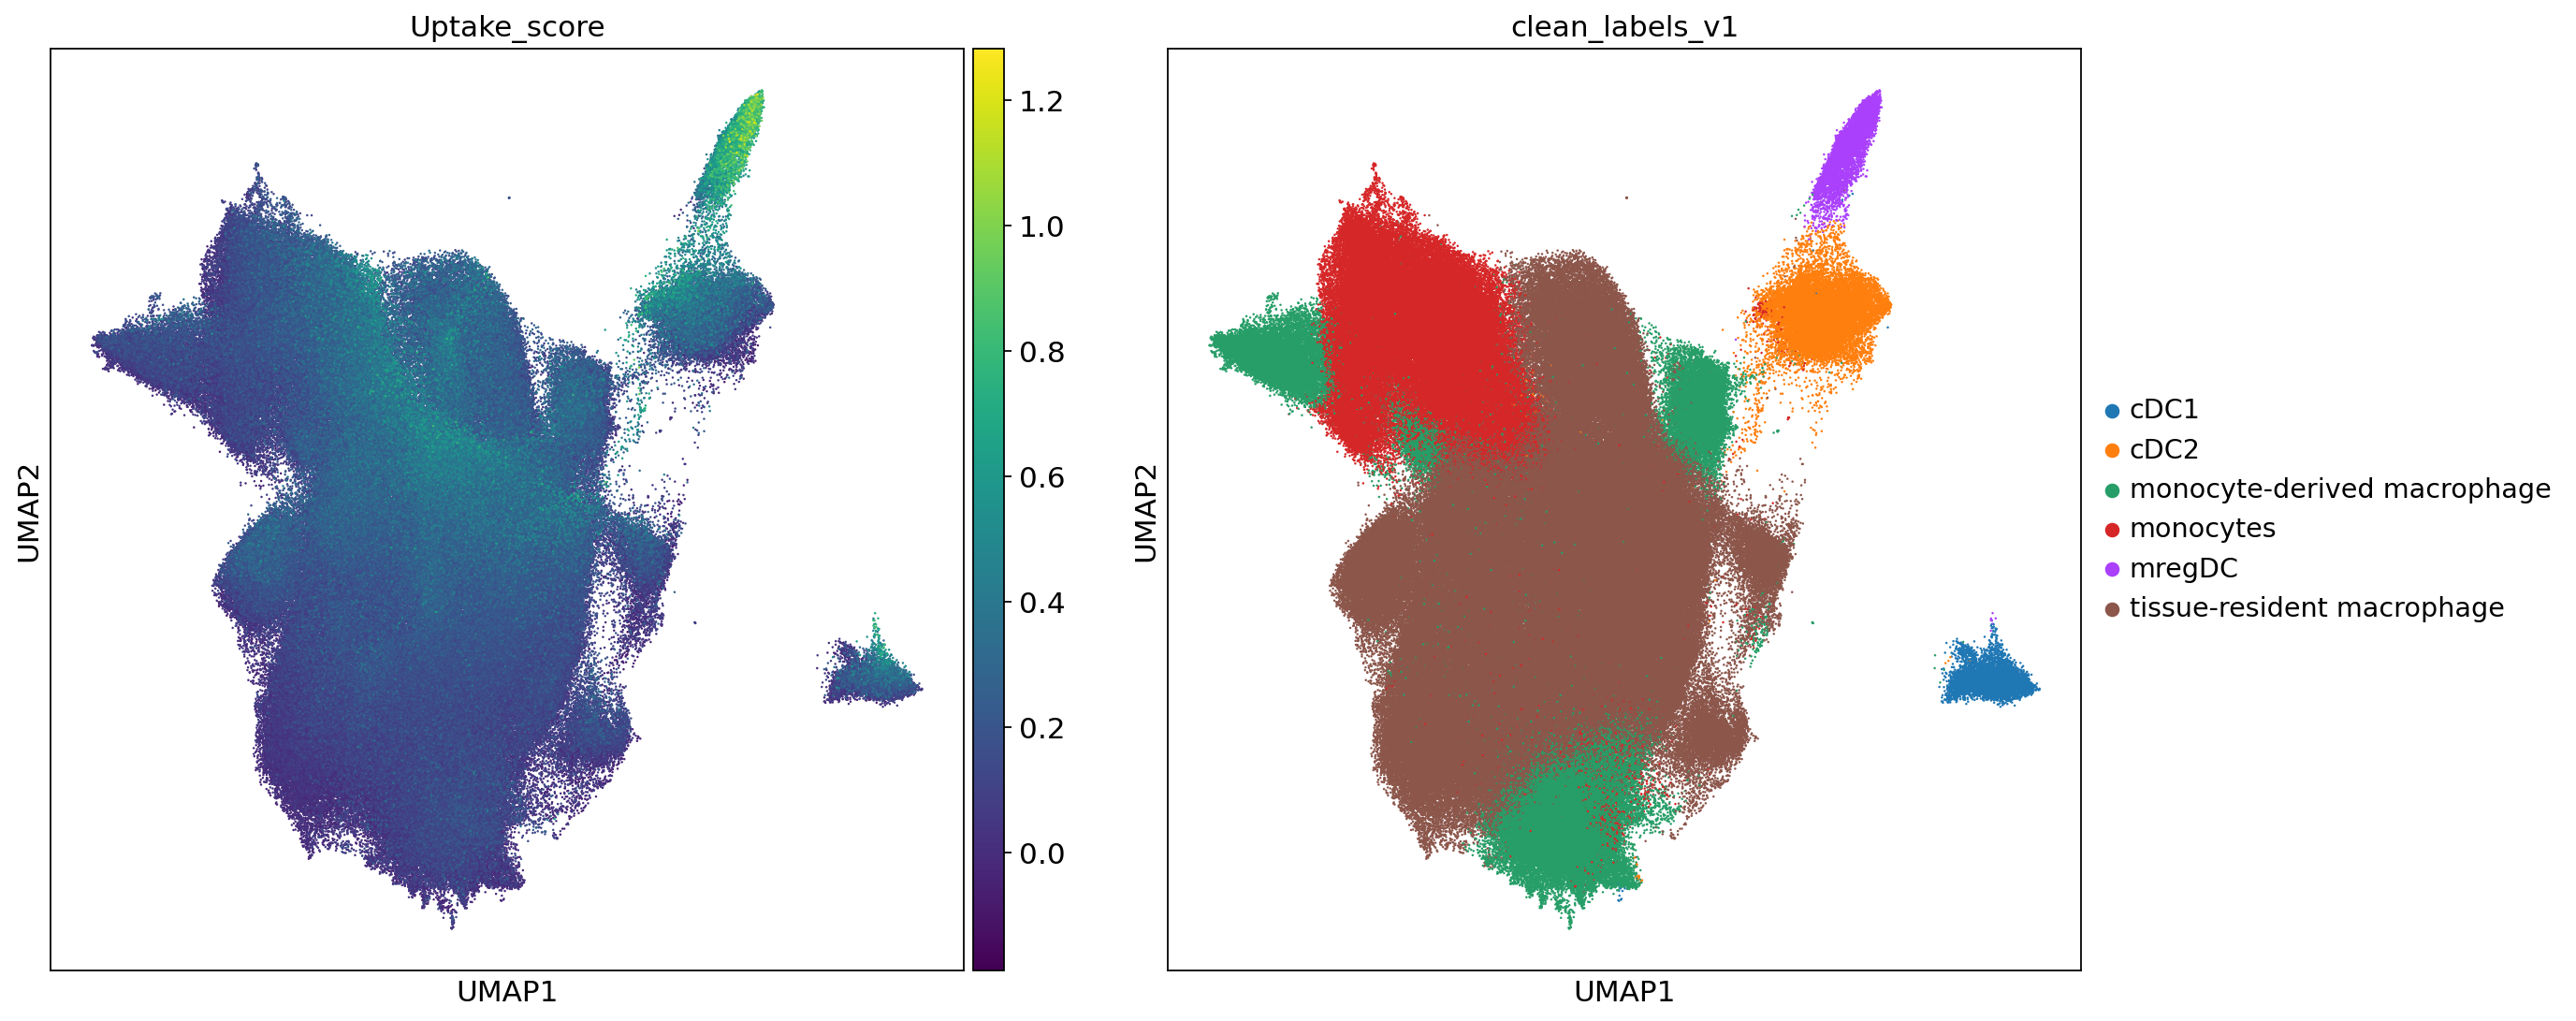

In [ ]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=2, size=5)

In [ ]:
colour_vars = ["Uptake_score","clean-leiden_subcluster2"]

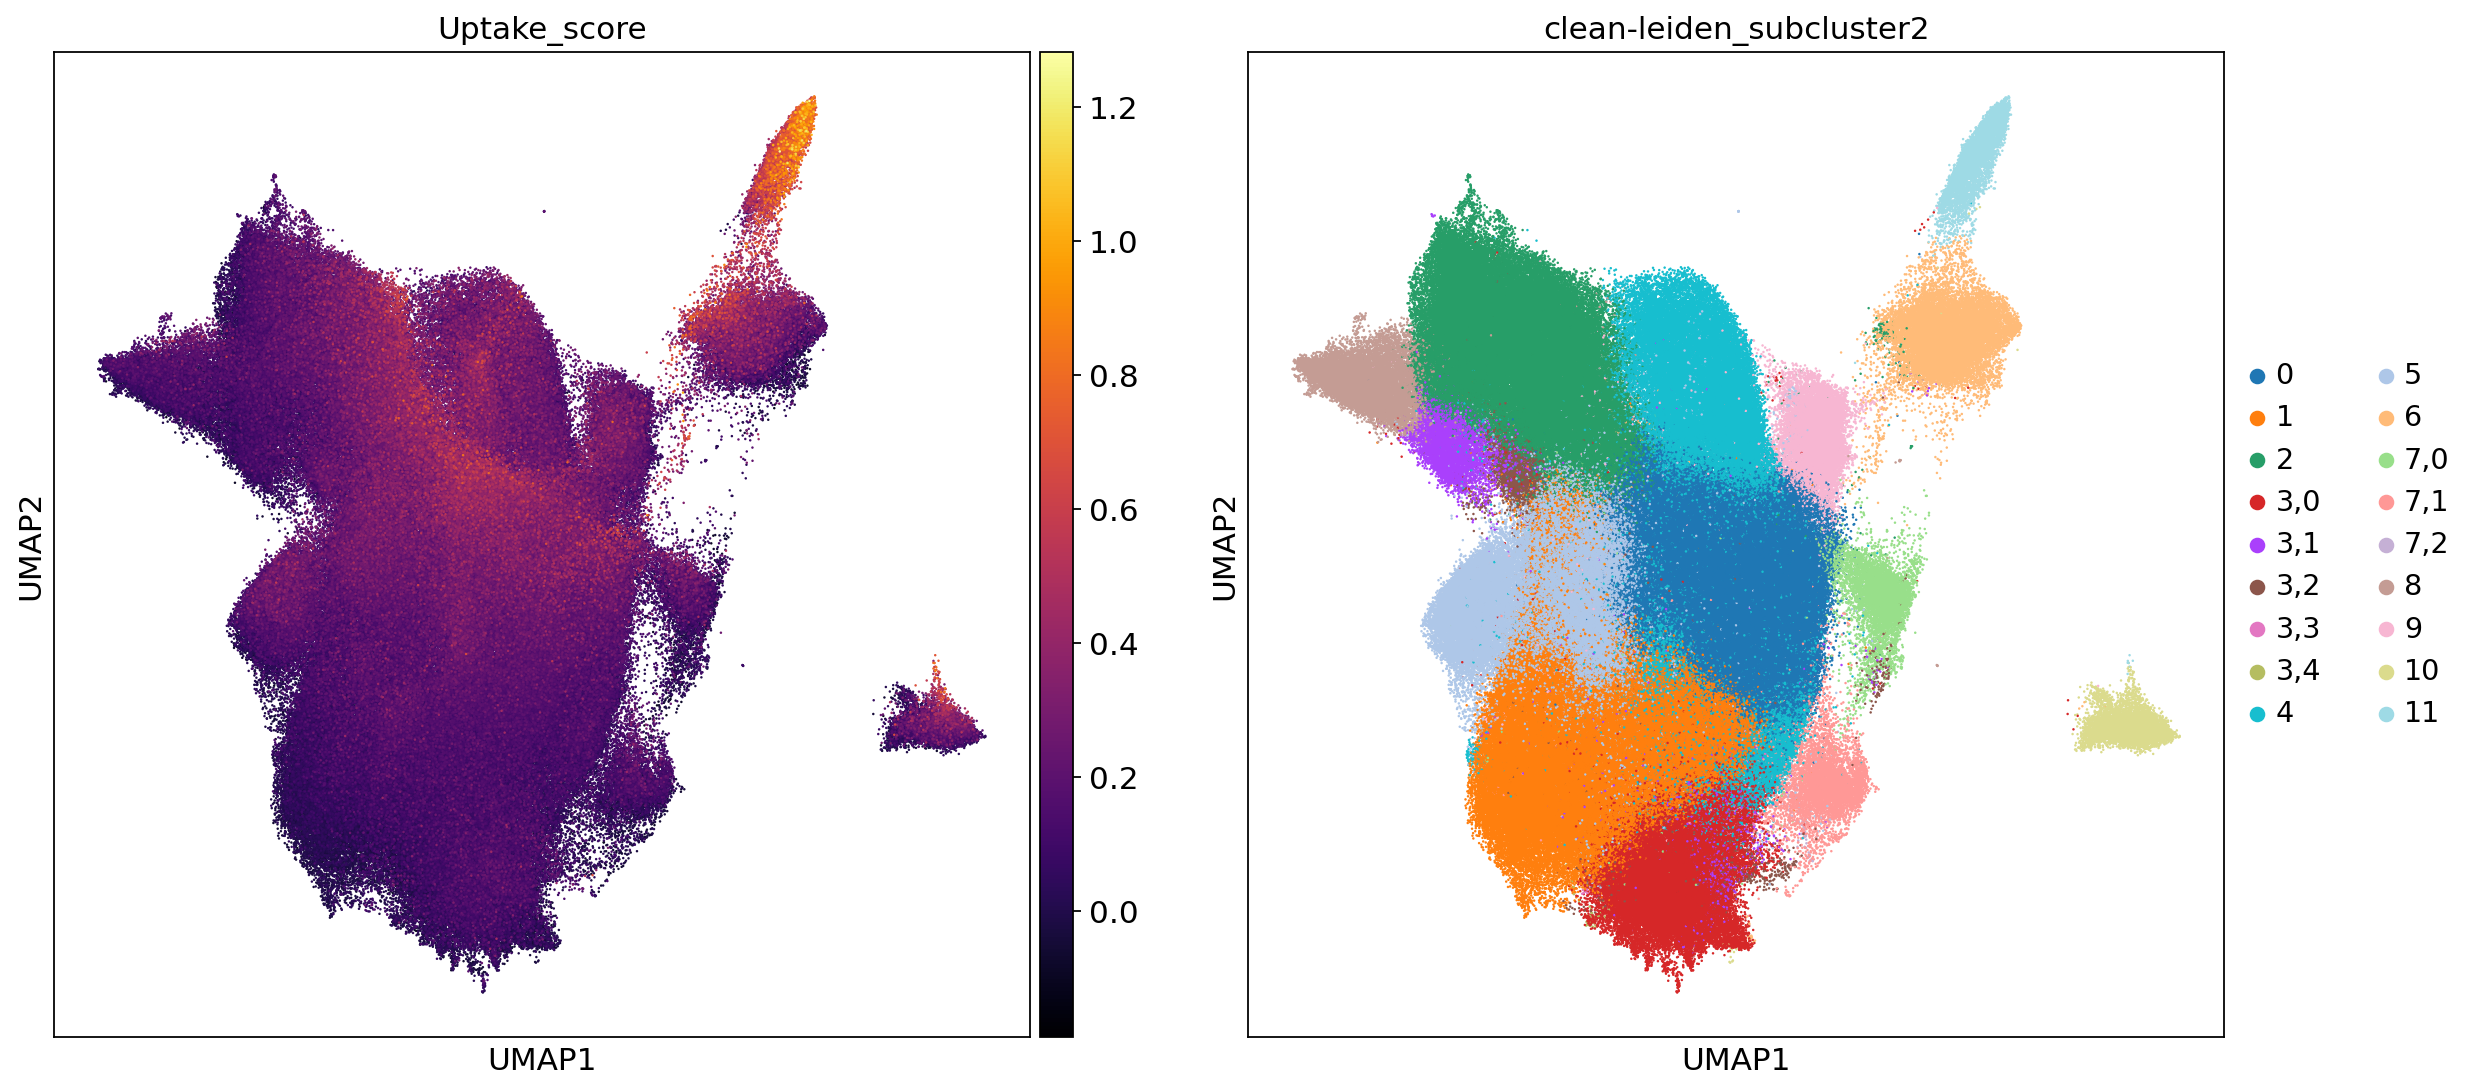

In [ ]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=2, size=5, color_map="inferno")

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
# Calculate the mean scores for each cluster
cluster_labels = data.obs['clean_labels_v1']
uptake_scores = data.obs['Uptake_score']

In [ ]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores.groupby(cluster_labels).mean(),
})

/scratch/temp/11099731/ipykernel_184567/2087912047.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


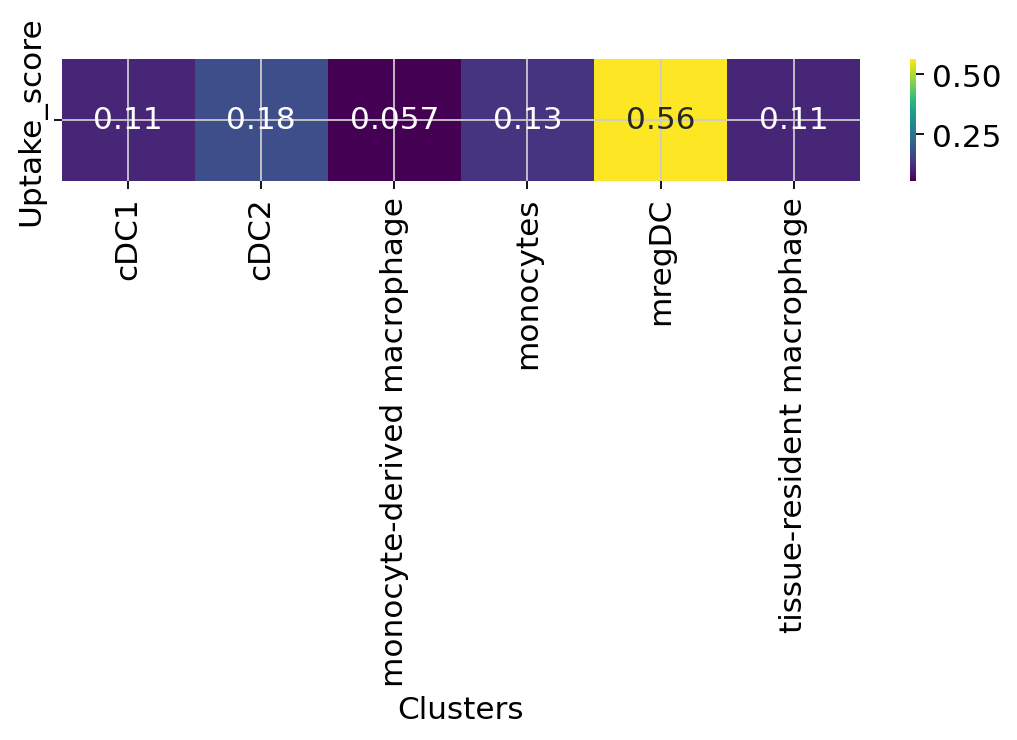

In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 1))
sns.heatmap(scores_df.T, cmap='viridis', annot=True, cbar=True)
plt.xlabel('Clusters')
plt.show()

In [ ]:
# Calculate the mean scores for each cluster
cluster_labels = data.obs['clean-leiden_subcluster2']
uptake_scores = data.obs['Uptake_score']

In [ ]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores.groupby(cluster_labels).mean(),
})

/scratch/temp/11099731/ipykernel_184567/2087912047.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


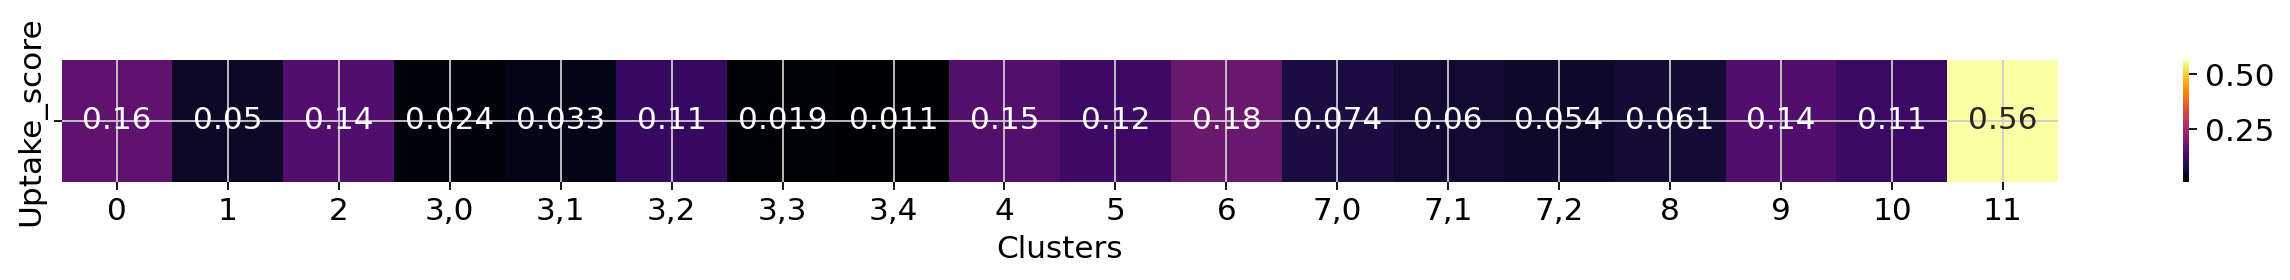

In [ ]:
# Plot the heatmap
plt.figure(figsize=(20, 1))
sns.heatmap(scores_df.T, cmap='inferno', annot=True, cbar=True)
plt.xlabel('Clusters')
plt.show()

### split by cancer subtype

In [ ]:
# Calculate the mean scores for each cluster
cluster_labels = data.obs['clean_labels_v1']
uptake_scores = data.obs['Uptake_score']
cancer_subtype = data.obs['cancer_subtype']

In [ ]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores,
    'cluster': cluster_labels,
    'cancer_subtype': cancer_subtype
})

mean_scores_df = scores_df.groupby(['cancer_subtype', 'cluster']).mean().unstack()
mean_scores_df = mean_scores_df.T

/scratch/temp/11099731/ipykernel_184567/50111509.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


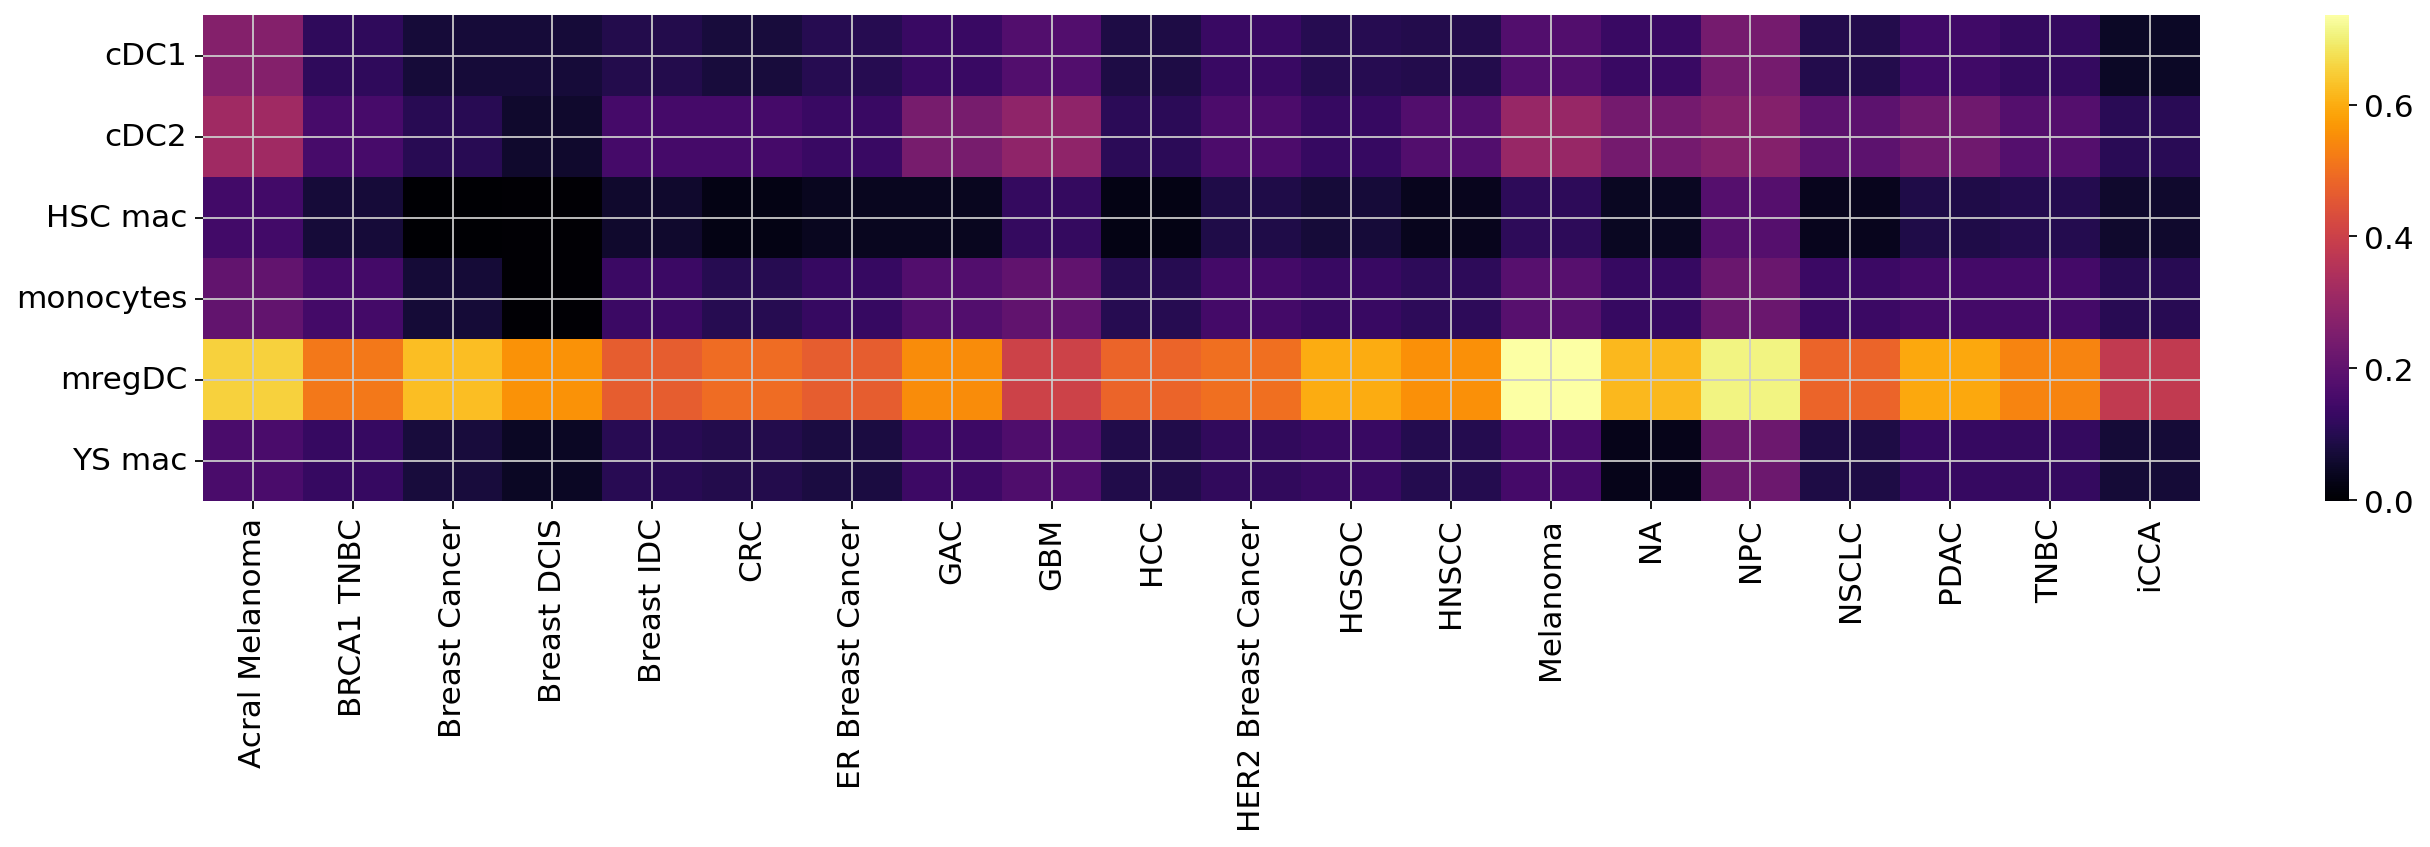

In [ ]:
# Plot the heatmap
plt.figure(figsize=(20, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno')
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()


### make figure for poster showing sig for different cancer types

In [ ]:
# make an object without healthy tissue 
disease = data[~data.obs["cancer_subtype"].isin(["NA"])]

In [ ]:
disease

View of AnnData object with n_obs × n_vars = 434431 × 1270
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'clean-leiden_subcluster', 'clean-leiden_subcluster2', 'clean_labels_v1', 'YS_score', 'HSC_score', 'CD5nDC2_up_vDC3_score', 'DC3_up_vCD5nDC2_score', 'CD5pDC2_up_vDC3_score', 'DC3_up_vCD5pDC2_score', 'DC3_up_vMono_score', 'Mono_up_vDC3_score', 'Uptake_score', 'cancer_type_broad'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_

In [ ]:
# Calculate the mean scores for each cluster
cluster_labels = disease.obs['clean_labels_v1']
uptake_scores = disease.obs['Uptake_score']
cancer_subtype = disease.obs['cancer_type_broad']

In [ ]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores,
    'cluster': cluster_labels,
    'cancer_subtype': cancer_subtype
})

mean_scores_df = scores_df.groupby(['cancer_subtype', 'cluster']).mean().unstack()
mean_scores_df = mean_scores_df.T

/scratch/temp/11116091/ipykernel_2722812/50111509.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


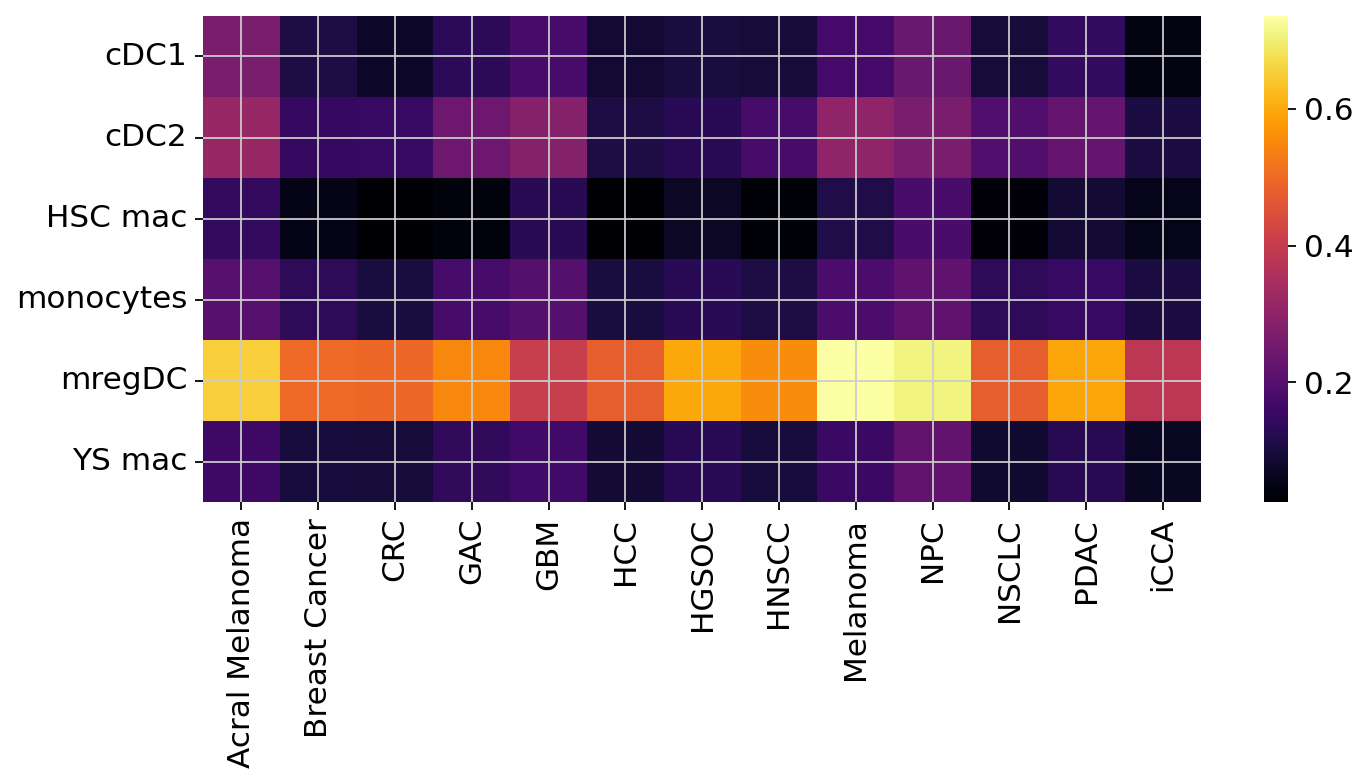

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno')
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()

/scratch/temp/11103320/ipykernel_94542/2395366686.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


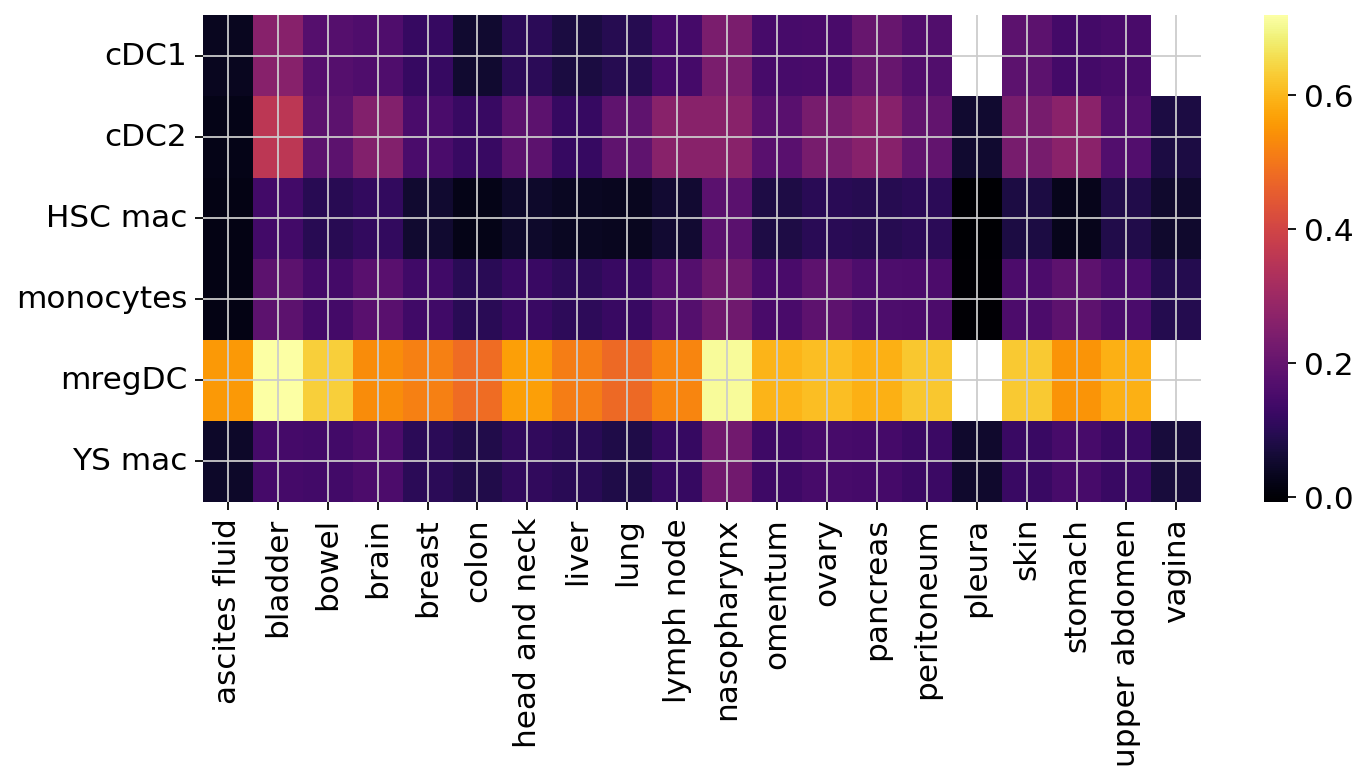

In [ ]:
# Calculate the mean scores for each cluster
cluster_labels = disease.obs['clean_labels_v1']
uptake_scores = disease.obs['Uptake_score']
cancer_subtype = disease.obs['site']

# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores,
    'cluster': cluster_labels,
    'cancer_subtype': cancer_subtype
})

mean_scores_df = scores_df.groupby(['cancer_subtype', 'cluster']).mean().unstack()
mean_scores_df = mean_scores_df.T

# Plot the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno')
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()

### By cluster

In [ ]:
# Calculate the mean scores for each cluster
cluster_labels = data.obs['clean-leiden_subcluster2']
uptake_scores = data.obs['Uptake_score']
cancer_subtype = data.obs['cancer_subtype']

In [ ]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores,
    'cluster': cluster_labels,
    'cancer_subtype': cancer_subtype
})

mean_scores_df = scores_df.groupby(['cancer_subtype', 'cluster']).mean().unstack()
mean_scores_df = mean_scores_df.T

/scratch/temp/11099731/ipykernel_184567/50111509.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


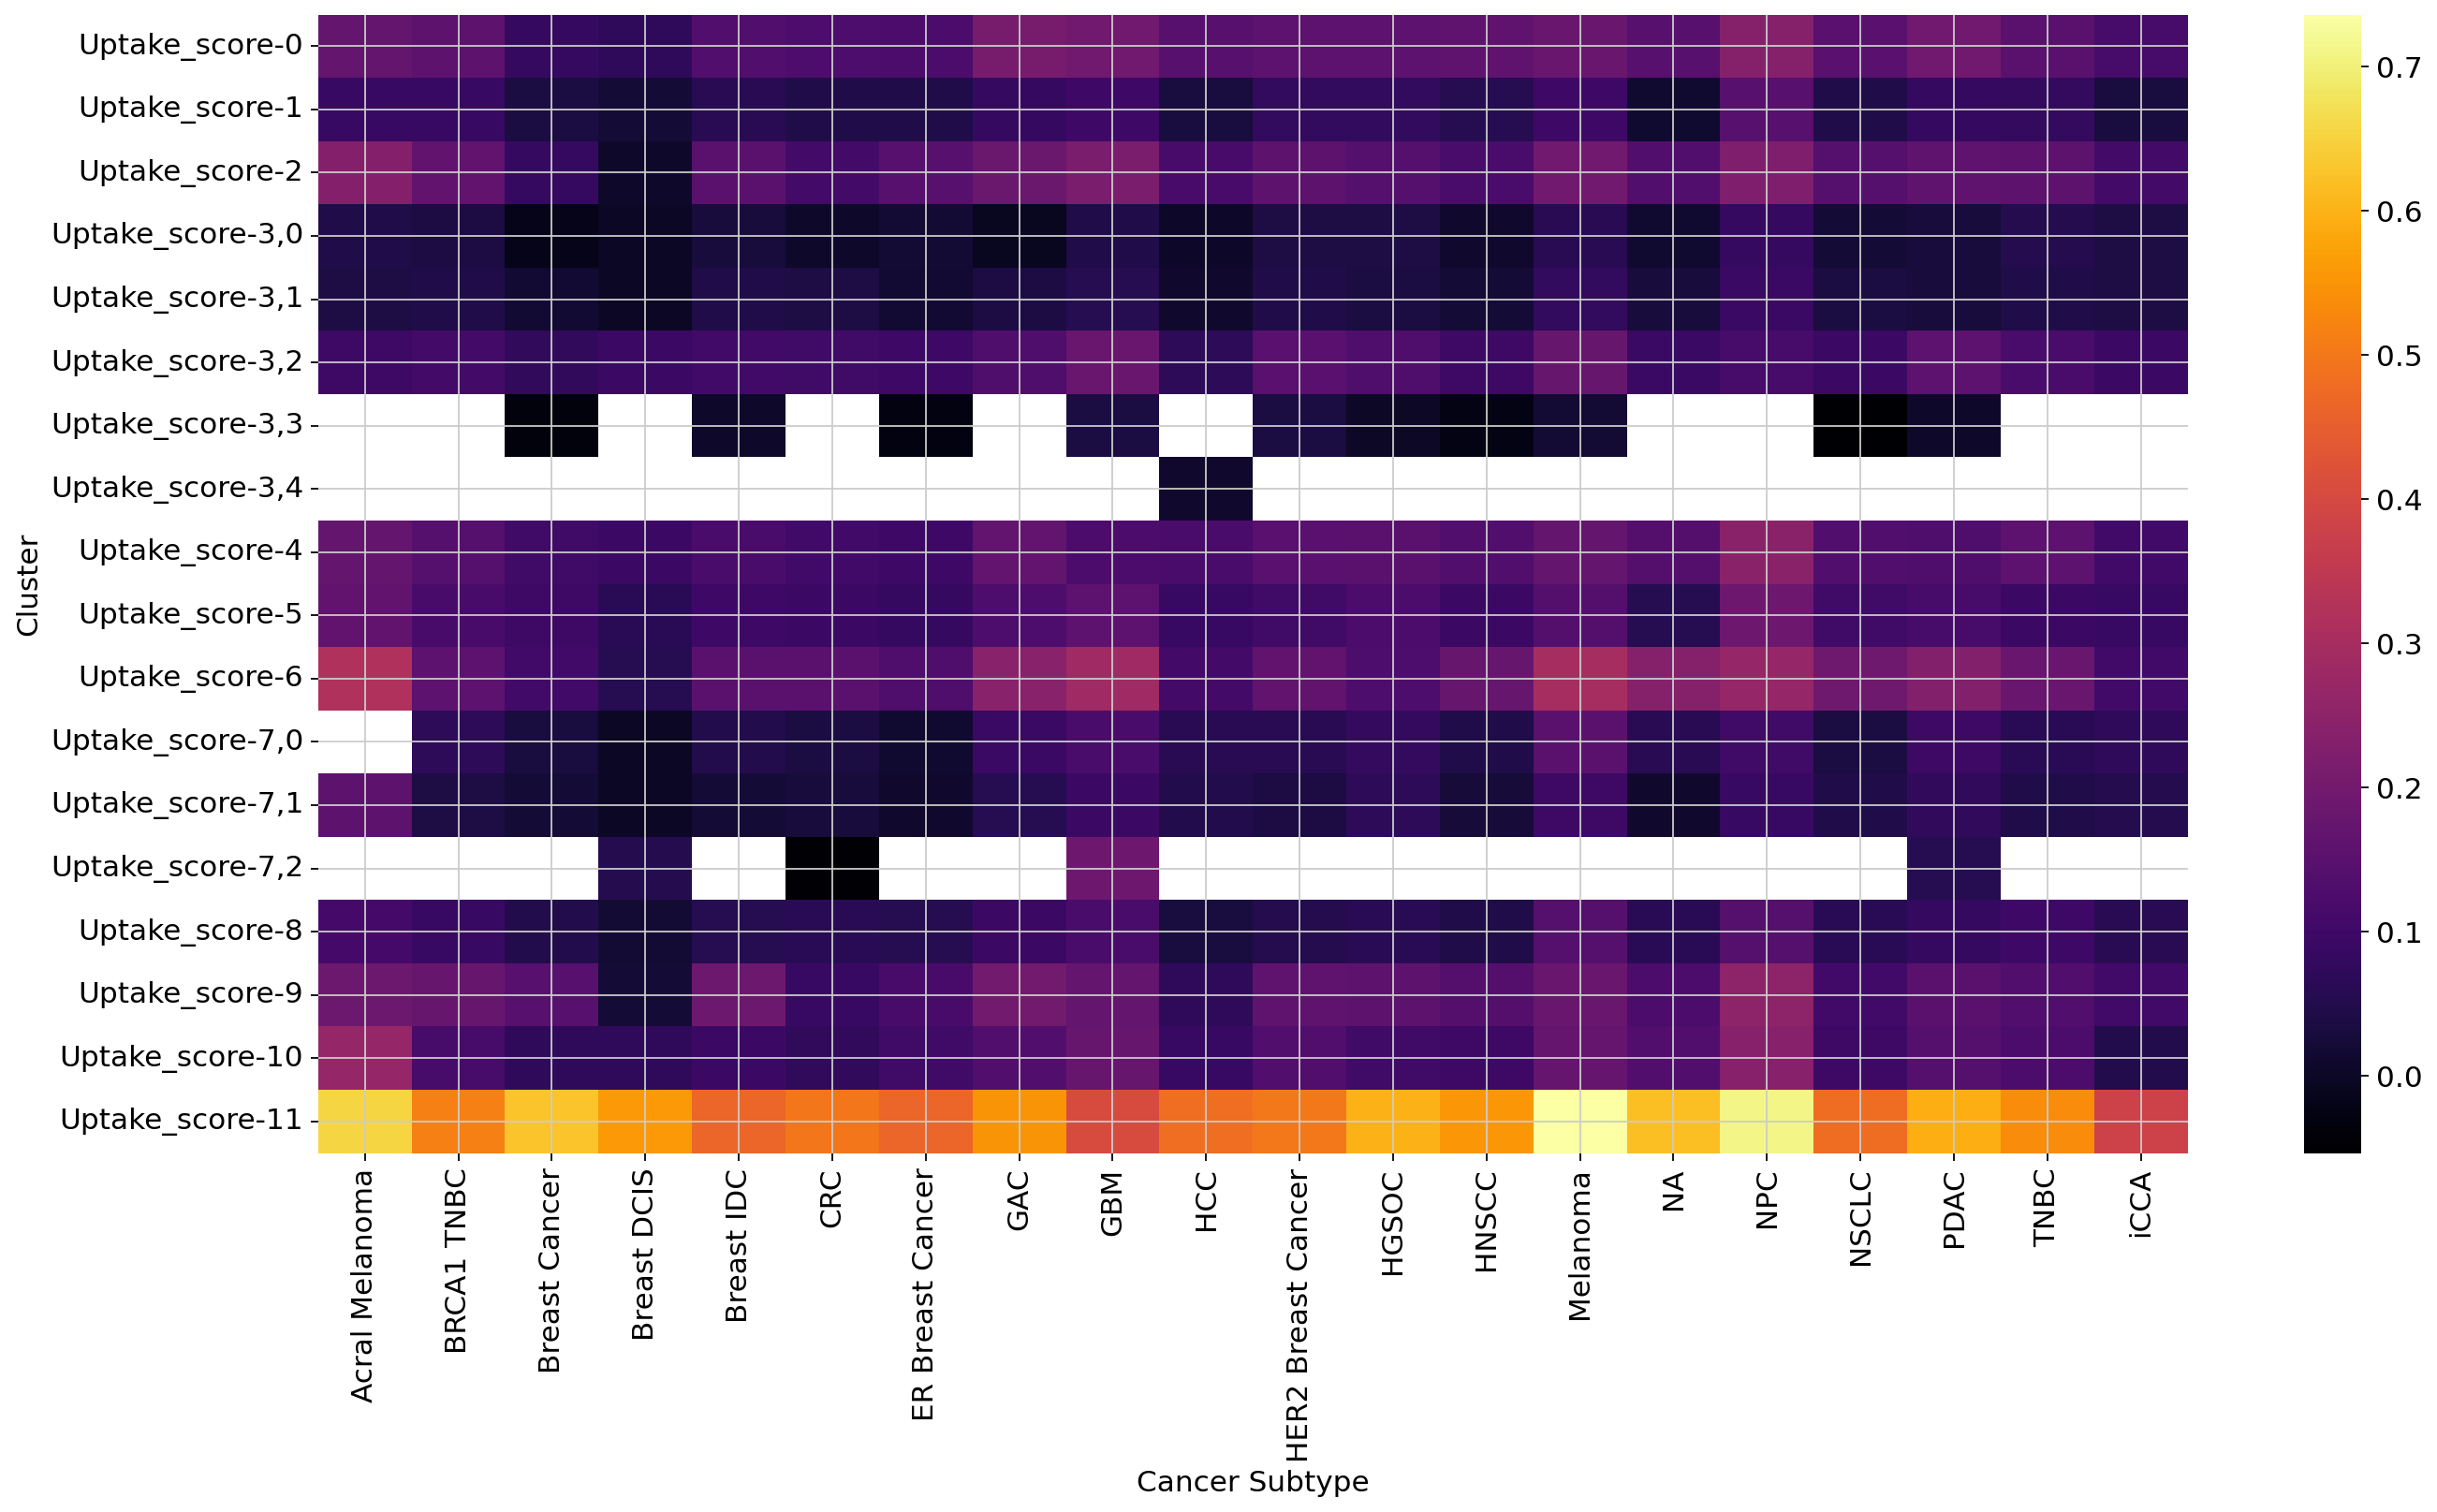

In [ ]:
# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(mean_scores_df, cmap='inferno', linewidths=0)
plt.xlabel('Cancer Subtype')
plt.ylabel('Cluster')
plt.show()

In [ ]:
# Calculate the mean scores for each cluster
cluster_labels = data.obs['clean_labels_v1']
uptake_scores = data.obs['Uptake_score']
cancer_subtype = data.obs['sample_type_major']

In [ ]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores,
    'cluster': cluster_labels,
    'cancer_subtype': cancer_subtype
})

mean_scores_df = scores_df.groupby(['cancer_subtype', 'cluster']).mean().unstack()
mean_scores_df = mean_scores_df.T

/scratch/temp/11099731/ipykernel_184567/50111509.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


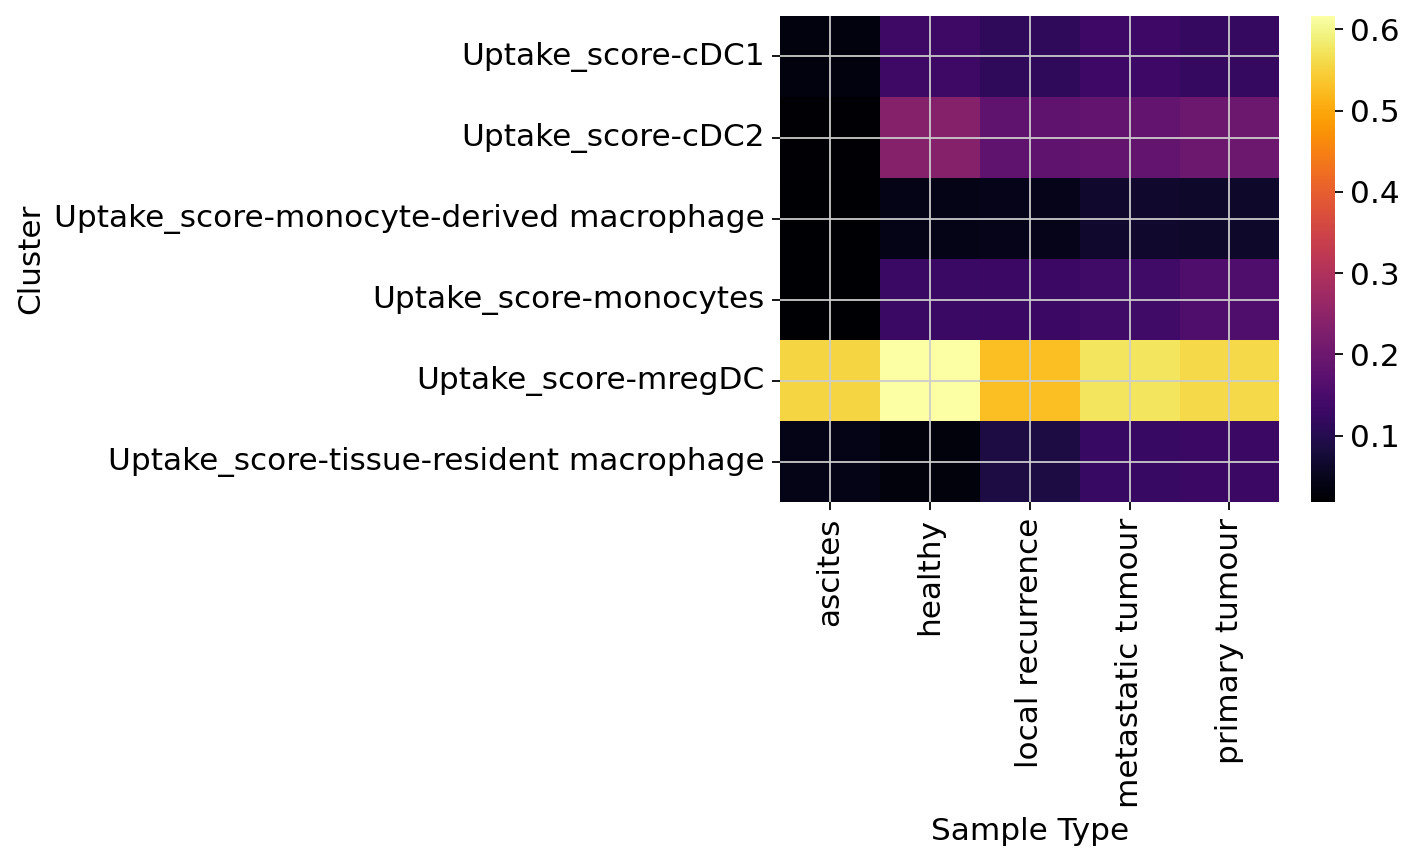

In [ ]:
# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(mean_scores_df, cmap='inferno', linewidths=0)
plt.xlabel('Sample Type')
plt.ylabel('Cluster')
plt.show()

In [ ]:
#export to use later
data.write_h5ad("NRclean_clustered.h5ad", compression="gzip")

### Getting stats for graph: